C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


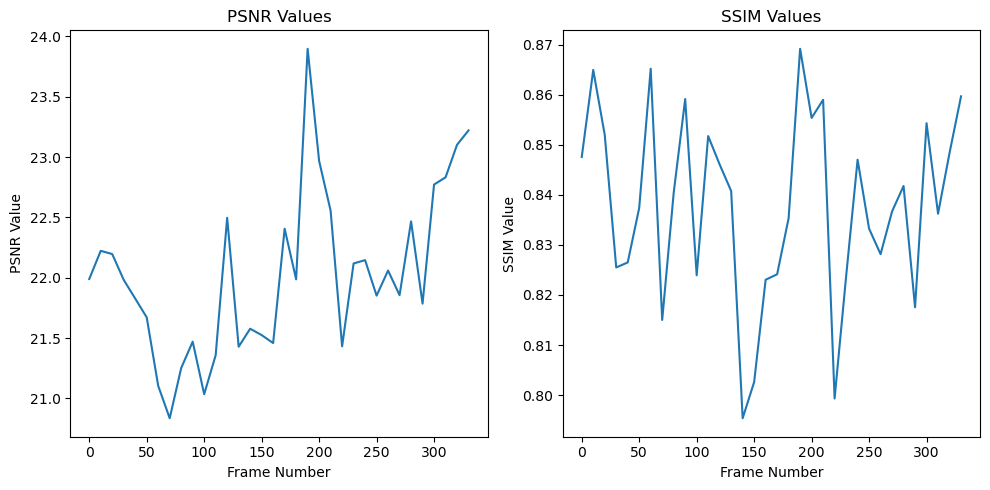

Frame Number | PSNR Value | SSIM Value
-------------------------------------
     0       |   21.99    |    0.85   
     10      |   22.22    |    0.86   
     20      |   22.20    |    0.85   
     30      |   21.98    |    0.83   
     40      |   21.83    |    0.83   
     50      |   21.67    |    0.84   
     60      |   21.10    |    0.87   
     70      |   20.84    |    0.82   
     80      |   21.25    |    0.84   
     90      |   21.47    |    0.86   
    100      |   21.04    |    0.82   
    110      |   21.36    |    0.85   
    120      |   22.50    |    0.85   
    130      |   21.43    |    0.84   
    140      |   21.58    |    0.80   
    150      |   21.53    |    0.80   
    160      |   21.46    |    0.82   
    170      |   22.41    |    0.82   
    180      |   21.99    |    0.84   
    190      |   23.90    |    0.87   
    200      |   22.97    |    0.86   
    210      |   22.56    |    0.86   
    220      |   21.43    |    0.80   
    230      |   22.12    

In [1]:
import cv2
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# Directory to save the extracted frames
output_dir = r"C:\Users\sch0w\Desktop\shadow_remover\img_extract"

def extract_and_split_frames(video_path, interval=10):
    # Check if the directory exists, if not create it
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Open the video file for reading
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    original_filenames = []
    output_filenames = []

    # Read frames until the end of the video
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Process every 'interval' frame (e.g., every 10th frame)
        if frame_count % interval == 0:
            # Split the frame into original and output based on width
            height, width, _ = frame.shape
            mid_width = width // 2
            original = frame[:, :mid_width]
            output = frame[:, mid_width:]

            # Save the original and output frames as JPG files
            original_filename = os.path.join(output_dir, f"original_{frame_count}.jpg")
            output_filename = os.path.join(output_dir, f"output_{frame_count}.jpg")
            cv2.imwrite(original_filename, original)
            cv2.imwrite(output_filename, output)

            # Store the filenames for metric calculation later
            original_filenames.append(original_filename)
            output_filenames.append(output_filename)

        frame_count += 1

    # Release the video capture object
    cap.release()
    return original_filenames, output_filenames

# Path to the video file
video_path = r"C:\Users\sch0w\Desktop\shadow_remover\no_shadow_output_v8.mp4"
original_frames, output_frames = extract_and_split_frames(video_path)

def calculate_metrics(original_path, output_path):
    # Read the images in grayscale for metric calculation
    original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
    output = cv2.imread(output_path, cv2.IMREAD_GRAYSCALE)
    # Calculate PSNR using OpenCV
    psnr = cv2.PSNR(original, output)
    # Calculate SSIM using scikit-image
    ssim_value = ssim(original, output)
    return psnr, ssim_value

# Lists to store PSNR and SSIM values for all frames
psnr_values = []
ssim_values = []

# Calculate PSNR and SSIM for each pair of frames
for original, output in zip(original_frames, output_frames):
    psnr, ssim_val = calculate_metrics(original, output)
    psnr_values.append(psnr)
    ssim_values.append(ssim_val)

# Create a list of frame numbers based on the interval at which you sampled frames
frame_numbers = list(range(0, len(psnr_values)*10, 10))

# Plotting the PSNR values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(frame_numbers, psnr_values)  # Using the frame_numbers for x-axis
plt.title('PSNR Values')
plt.xlabel('Frame Number')
plt.ylabel('PSNR Value')

# Plotting the SSIM values
plt.subplot(1, 2, 2)
plt.plot(frame_numbers, ssim_values)  # Using the frame_numbers for x-axis
plt.title('SSIM Values')
plt.xlabel('Frame Number')
plt.ylabel('SSIM Value')

plt.tight_layout()
plt.show()

# Print the PSNR and SSIM values for each frame
print("Frame Number | PSNR Value | SSIM Value")
print("-------------------------------------")
for i, (p, s) in enumerate(zip(psnr_values, ssim_values)):
    print(f"{i * 10:^12} | {p:^10.2f} | {s:^10.2f}")

# Calculate and print the average PSNR and SSIM values
avg_psnr = np.mean(psnr_values)
avg_ssim = np.mean(ssim_values)
print(f"\nAverage PSNR: {avg_psnr:.2f}")
print(f"Average SSIM: {avg_ssim:.2f}")
